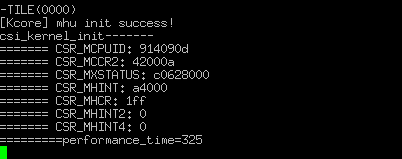

In [ ]:
CSR_MCPUID=0x914090d
# CSR_MCCR2=0x42000a    # 当前配置
# CSR_MCCR2=0x2042000a  # 预取1条指令
# CSR_MCCR2=0x4042000a  # 预取2条指令
CSR_MCCR2=0x6042000a  # 预取3条指令
CSR_MXSTATUS=0xc0628000
# CSR_MHINT=0xa4000
CSR_MHINT=0xec704
CSR_MHCR=0x1ff
# CSR_MHCR=0x10011FF
CSR_MHINT2=0
CSR_MHINT4=0

In [4]:
def parse_csr_mcpuid(value):
    cpu_type = (value >> 8) & 0xf
    cpu_ver = (value >> 12) & 0xffff
    return cpu_type, cpu_ver

cpu_type, cpu_ver = parse_csr_mcpuid(CSR_MCPUID)
print(f"cpu_type = {cpu_type:#x}")
print(f"cpu_ver = {cpu_ver:#x}")

cpu_type = 0x9
cpu_ver = 0x9140


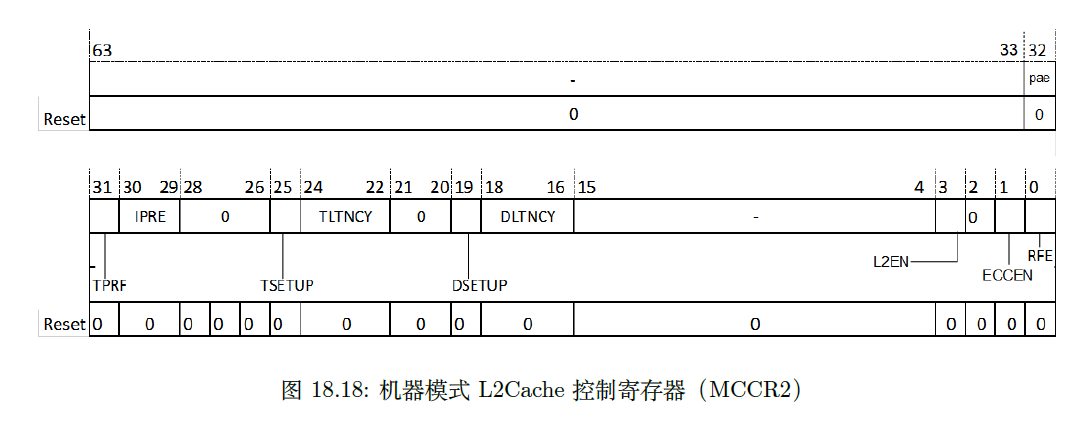

In [32]:

def parse_mccr2(value):
    # L2 cache 的 Icache能力
    print(f'MCCR2: 0x{value: 0X}')
    return {
        "TPRF":      (value >> 31) & 0x1,  # L2 Cache的TLB预取使能
        "IPRE":      (value >> 29) & 0x3,  # L2 Cache的指令预取能力，0~3,0 表示关闭
        "TSETUP":    (value >> 25) & 0x1,  # L2 Cache的TAG RAM是否需要额外setup周期
        "TLTNCY":    (value >> 22) & 0x7,  # L2 Cache TAG RAM的访问周期
        "DSETUP":    (value >> 19) & 0x1,  # L2 Cache的DATA RAM是否需要额外setup周期
        "DLTNCY":    (value >> 16) & 0x7,  # L2 Cache的 DATA RAM访问周期, value+1 cycle
        "L2EN":      (value >> 3) & 0x1,   # Icache 使能位
        "ECCEN":     (value >> 1) & 0x1,   # ECC使能位
        "RFE":       (value) & 0x1,   # 是否回填L2 cache
    }

result = parse_mccr2(CSR_MCCR2)
for k, v in result.items():
    print(f"{k}: {v}")

MCCR2: 0x 6042000A
TPRF: 0
IPRE: 3
TSETUP: 0
TLTNCY: 1
DSETUP: 0
DLTNCY: 2
L2EN: 1
ECCEN: 1
RFE: 0


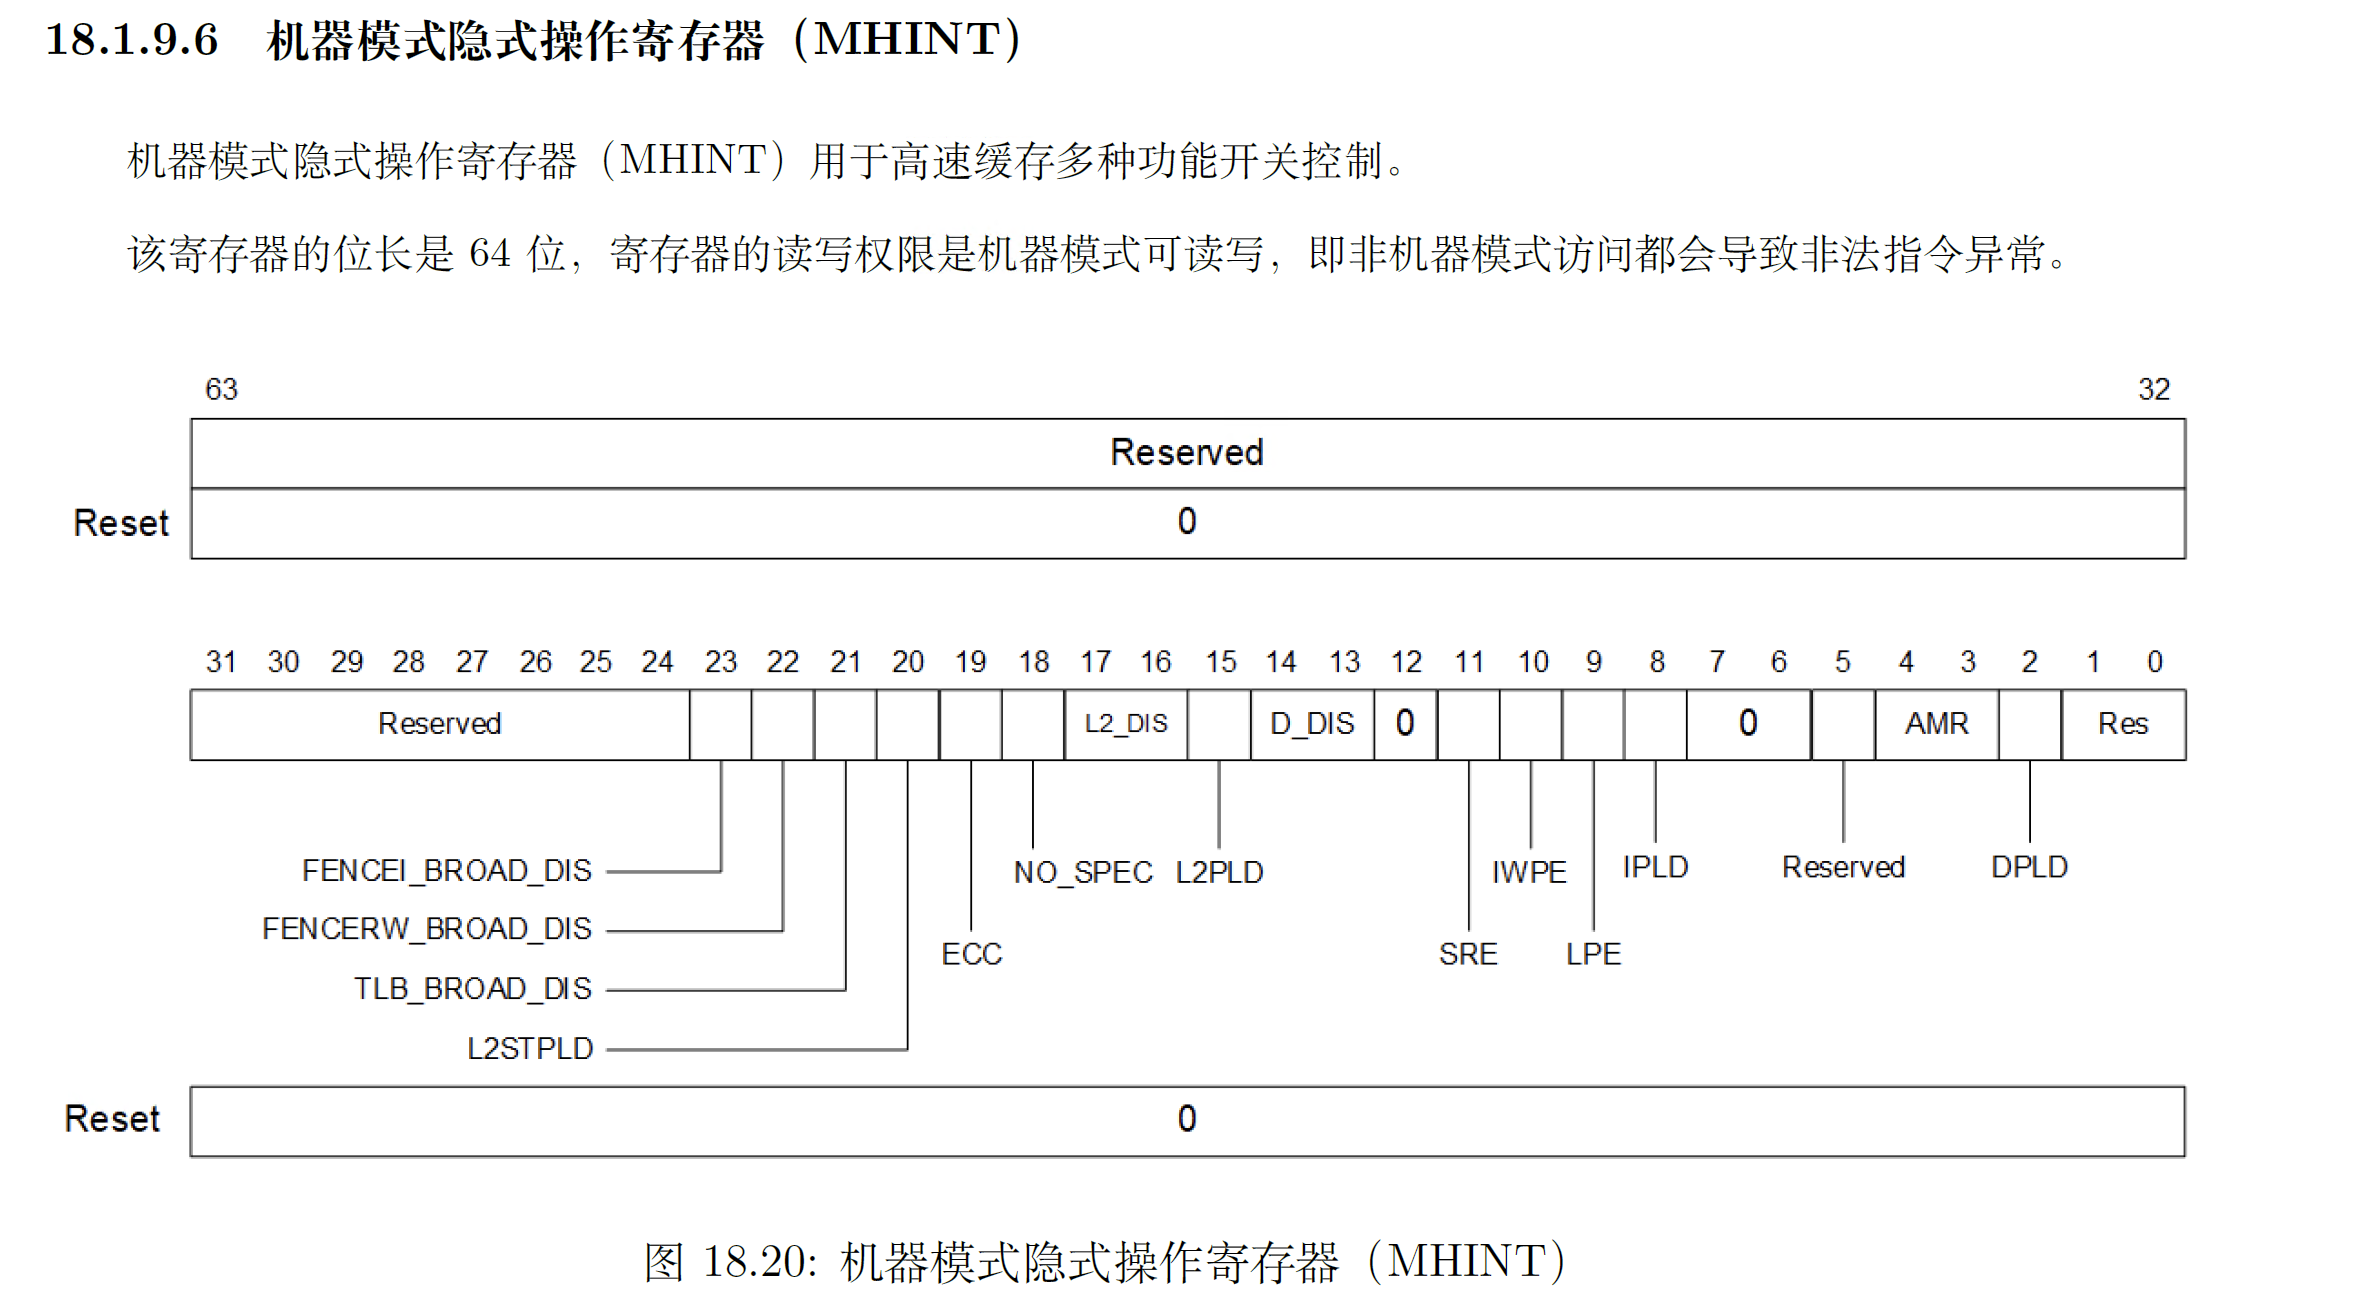

In [46]:
def parse_mhint(value):
    # L2 cache D cache没配置
    print(f'MHINT: 0x{value: 0X}')
    return {
        "FENCEI_BROAD_DIS": (value >> 23) & 1,
        "FENCERW_BROAD_DIS": (value >> 22) & 1,
        "TLB_BROAD_DIS": (value >> 21) & 1,
        "L2STPLD": (value >> 20) & 1,
        "ECC": (value >> 19) & 1,
        "NO_SPEC": (value >> 18) & 1,
        "L2_DIS": (value >> 16) & 3,
        "L2PLD": (value >> 15) & 1,
        "D_DIS": (value >> 13) & 3,
        "SRE": (value >> 11) & 1,
        "IWPE": (value >> 10) & 1,
        "LPE": (value >> 9) & 1,
        "IPLD": (value >> 8) & 1,
        "AMR": (value >> 3) & 3,
        "DPLD": (value >> 2) & 1,
        # 其余位可按需求补充
    }

# 示例用法
result = parse_mhint(CSR_MHINT)
for k, v in result.items():
    print(f"{k}: {v}")

MHINT: 0x EC704
FENCEI_BROAD_DIS: 0
FENCERW_BROAD_DIS: 0
TLB_BROAD_DIS: 0
L2STPLD: 0
ECC: 1
NO_SPEC: 1
L2_DIS: 2
L2PLD: 1
D_DIS: 2
SRE: 0
IWPE: 1
LPE: 1
IPLD: 1
AMR: 0
DPLD: 1


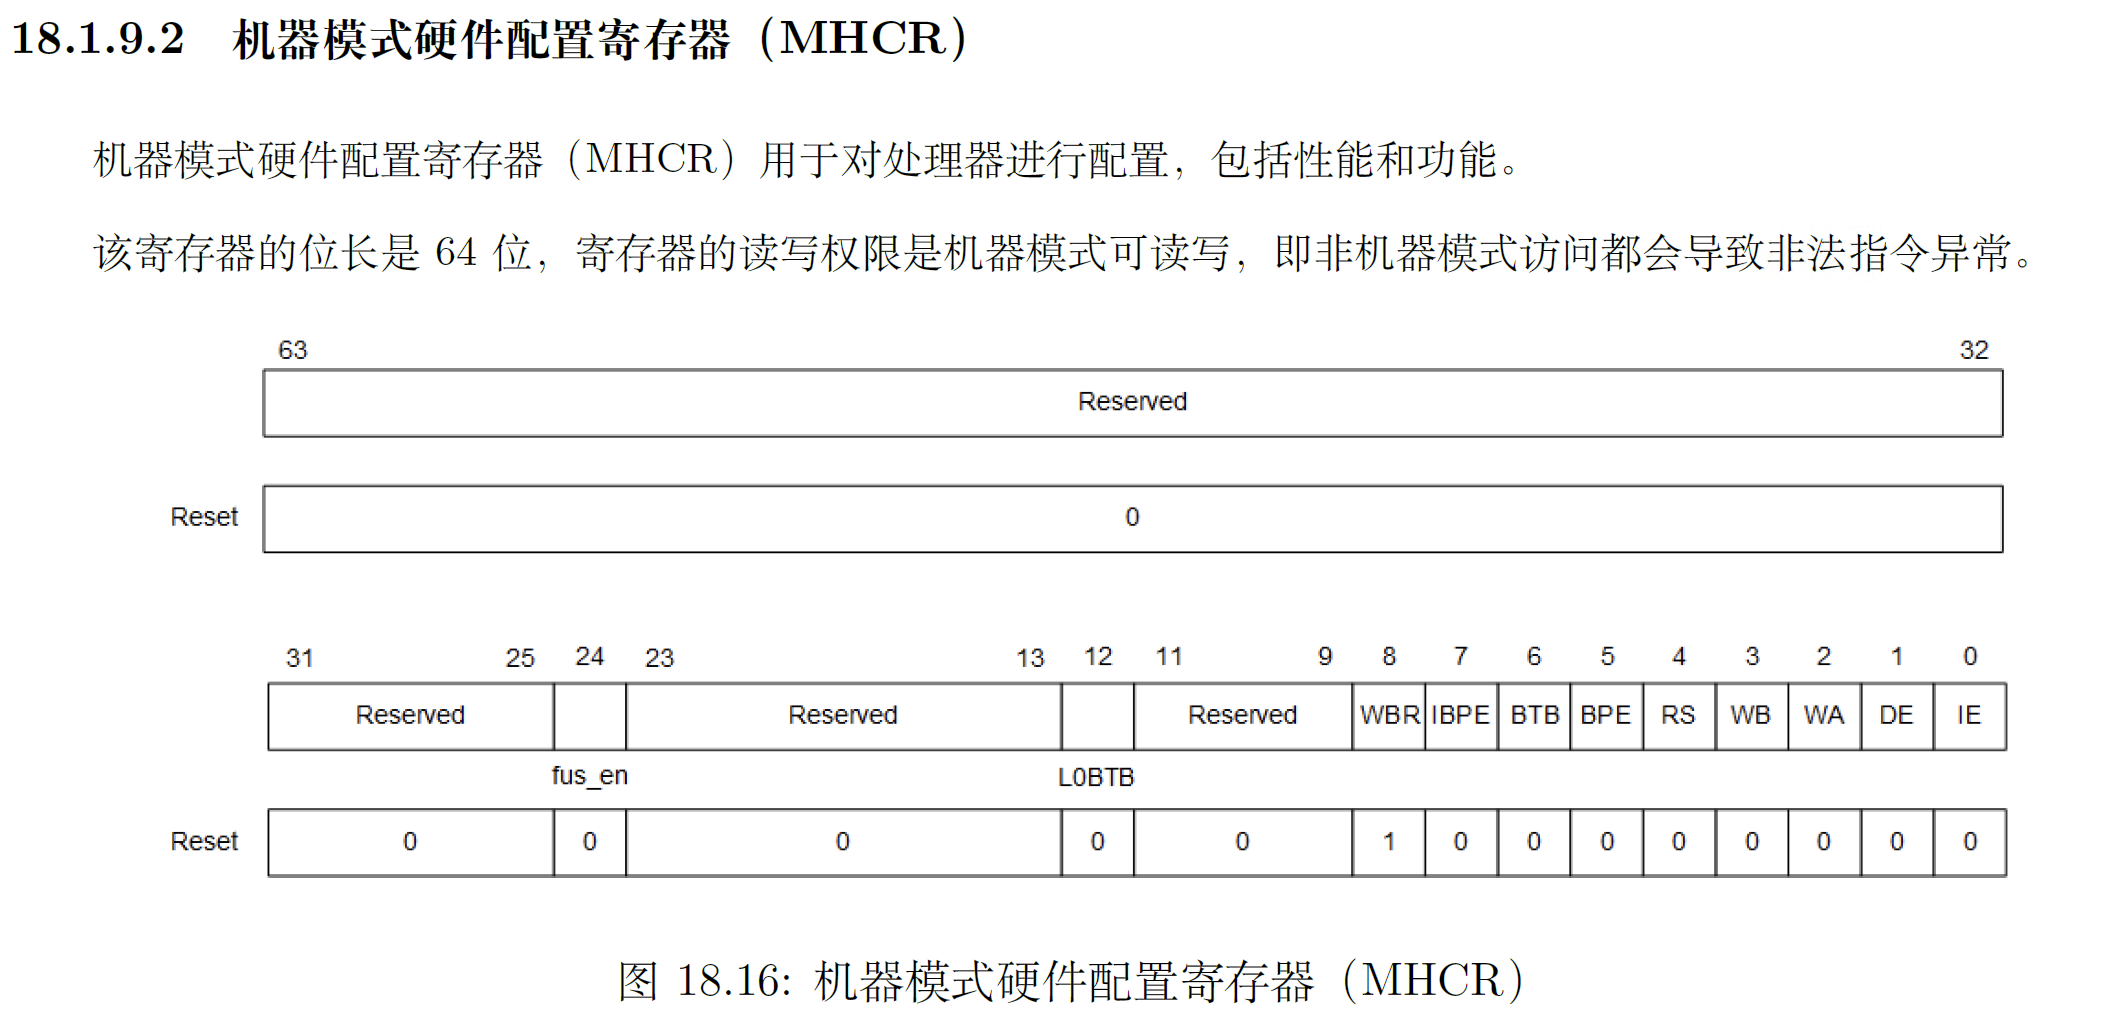

In [40]:
def parse_mhcr(value):
    """解析MHCR寄存器低32位"""
    # 都是L1 cache的
    print(f'MHCR: 0x{value: 0X}')
    return {
        "IE":   (value >> 0) & 0x1,  # Icache使能
        "DE":   (value >> 1) & 0x1,  # Dcache使能
        "WA":   (value >> 2) & 0x1,  # 高速缓存写分配设置： 0： write non-allocate模式 1： write allocate模式
        "WB":   (value >> 3) & 0x1,
        "RS":   (value >> 4) & 0x1,
        "BPE":  (value >> 5) & 0x1,
        "BTB":  (value >> 6) & 0x1,
        "IBPE": (value >> 7) & 0x1,
        "WBR":  (value >> 8) & 0x1,
        "L0BTB":(value >> 12) & 0x1,   # 强烈推荐开启  
        "fus_en": (value >> 24) & 0x1,   # 强烈推荐开启
        # 其他位均为reserved
    }

# 示例用法
result = parse_mhcr(CSR_MHCR)
for k, v in result.items():
    print(f"{k}: {v}")

MHCR: 0x 1FF
IE: 1
DE: 1
WA: 1
WB: 1
RS: 1
BPE: 1
BTB: 1
IBPE: 1
WBR: 1
L0BTB: 0
fus_en: 0
